## Initial PATH

In [1]:
import os
ROOT_PATH = "/home/jovyan/ChestXray-14"
INPUT_PATH = "/home/jovyan/ChestXray-14/dataset/ChestXray NIH"
INPUT_PATH = os.path.abspath(INPUT_PATH)

In [2]:
BATCH_SIZE = 128 # 128 only on Binary Classification
IMG_SIZE = 224
SEED = 42

In [3]:
EXPERIMENT_NAME = "multiclass_dataset"
OUT_PATH = os.path.abspath(f"{INPUT_PATH}/data/{EXPERIMENT_NAME}")
OUT_PATH

'/home/jovyan/ChestXray-14/dataset/ChestXray NIH/data/multiclass_dataset'

## Load Full Dataset

In [4]:
import pandas as pd
DEFAULT_DISPLAY_ROWS = 10 # defualt is 10
pd.set_option('display.max_rows', DEFAULT_DISPLAY_ROWS)

In [5]:
FILE_PATH = f"{INPUT_PATH}/preprocessed_data.csv"

In [6]:
df = pd.read_csv(FILE_PATH, index_col=0)
df = df.reset_index()
df["index"] = df["index"].apply(
    lambda x: os.path.abspath(f"{ROOT_PATH}/{x}")
)
df = df.set_index("index")
df

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_000.png,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_001.png,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_002.png,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000002_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000003_000.png,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030801_001.png,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030802_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030803_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Preprocessing

In [7]:
import numpy as np
import sys
sys.path.append('/home/jovyan/ChestXray-14')

In [8]:
from tqdm.notebook import tqdm
from modules.utils import serialize_fold

2023-04-04 17:16:50.702003: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.utils import shuffle

df = df.astype("int16")
df = shuffle(df, random_state=SEED)
# (df["No Finding"] == 0).astype('int16')
# # df_temp = df[["No Finding"]].copy()
# df[["Infiltration", "Atelectasis","Effusion"]]
# # df1, df2, df3, df4, df5 = np.split(df_temp, 5)
# # NUM_TO_SPLIT_FILES = 100

df_columns = df.columns
df_tmp = df.copy()
df_tmp['classes'] = None
df_tmp['class_list'] = None 

for idx in range(len(df_tmp)):
    df_tmp.iloc[idx, df_tmp.columns.get_loc('classes')] = ", ".join(df_columns[df.iloc[idx] == 1])
    df_tmp['class_list'].iloc[idx] = df_columns[df.iloc[idx] == 1]

df_tmp

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,classes,class_list
index,,,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_010/images/00022260_003.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00012048_007.png,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,"Infiltration, Nodule, Mass","Index(['Infiltration', 'Nodule', 'Mass'], dtyp..."
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_007/images/00014352_005.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_003/images/00006040_001.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00011202_002.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00018865_040.png,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,"Pleural_Thickening, Nodule","Index(['Pleural_Thickening', 'Nodule'], dtype=..."
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030028_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Mass,"Index(['Mass'], dtype='object')"
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00027679_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"


In [11]:
all_case = df_tmp['classes']
infiltration_index = all_case[all_case == 'Infiltration']

infiltration_df = pd.DataFrame({'index':infiltration_index.index, 'class':infiltration_index.values})
infiltration_df = infiltration_df.set_index("index")
infiltration_df = infiltration_df.sample(n=1000, random_state=SEED)
infiltration_df

,class
index,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00019326_000.png,Infiltration
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00013751_000.png,Infiltration
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00020228_001.png,Infiltration
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00013594_046.png,Infiltration
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_008/images/00016371_001.png,Infiltration
...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_008/images/00018370_000.png,Infiltration
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00001892_008.png,Infiltration
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00010308_005.png,Infiltration


In [12]:
all_case = df_tmp['classes']
atelectasis_index = all_case[all_case == 'Atelectasis']

atelectasis_df = pd.DataFrame({'index':atelectasis_index.index, 'class':atelectasis_index.values})
atelectasis_df = atelectasis_df.set_index("index")
atelectasis_df = atelectasis_df.sample(n=1000, random_state=SEED)
atelectasis_df

,class
index,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00002059_010.png,Atelectasis
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_010/images/00023170_001.png,Atelectasis
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_003/images/00005927_011.png,Atelectasis
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000143_011.png,Atelectasis
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00011835_002.png,Atelectasis
...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_003/images/00006057_001.png,Atelectasis
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00019209_001.png,Atelectasis
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_004/images/00007729_004.png,Atelectasis


In [13]:
all_case = df_tmp['classes']
effusion_index = all_case[all_case == 'Effusion']

effusion_df = pd.DataFrame({'index':effusion_index.index, 'class':effusion_index.values})
effusion_df = effusion_df.set_index("index")
effusion_df = effusion_df.sample(n=1000, random_state=SEED)
effusion_df

,class
index,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_004/images/00007055_007.png,Effusion
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00029358_001.png,Effusion
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00026971_011.png,Effusion
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00001470_005.png,Effusion
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00002843_010.png,Effusion
...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00029795_003.png,Effusion
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00029839_008.png,Effusion
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00011406_002.png,Effusion


In [14]:
all_case = df_tmp['classes']
nofinding_index = all_case[all_case == 'No Finding']

nofinding_df = pd.DataFrame({'index':nofinding_index.index, 'class':nofinding_index.values})
nofinding_df = nofinding_df.set_index("index")
nofinding_df = nofinding_df.sample(n=1000, random_state=SEED)
nofinding_df

,class
index,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00001931_008.png,No Finding
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_004/images/00009103_001.png,No Finding
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00027072_000.png,No Finding
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00010635_003.png,No Finding
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_004/images/00008992_000.png,No Finding
...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00002554_001.png,No Finding
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00027978_001.png,No Finding
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00013069_001.png,No Finding


In [15]:
new_df = pd.concat([infiltration_df, atelectasis_df, effusion_df, nofinding_df])
new_df = new_df.sample(frac=1, random_state=SEED)
new_df = shuffle(new_df, random_state=SEED)
new_df = new_df.reset_index()
new_df = new_df.set_index("index")

new_df["Infiltration"] = (new_df["class"] == "Infiltration").astype("int16")
new_df["Effusion"] = (new_df["class"] == "Effusion").astype("int16")
new_df["Atelectasis"] = (new_df["class"] == "Atelectasis").astype("int16")
new_df["No Finding"] = (new_df["class"] == "No Finding").astype("int16")

new_df = new_df.drop(columns=["class"])

df1, df2, df3, df4, df5 = np.split(new_df, 5)

In [16]:
new_df

,Infiltration,Effusion,Atelectasis,No Finding
index,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00013285_021.png,0,1,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00011380_011.png,0,1,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030439_005.png,0,0,1,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00028109_003.png,0,1,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00012620_009.png,1,0,0,0
...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_008/images/00017930_001.png,0,0,1,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_003/images/00006393_000.png,0,0,0,1
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00027851_001.png,0,0,0,1


## EDA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 0               Count
Infiltration    805
Effusion        790
Atelectasis     797
No Finding      808
    Dataset Infomation:
        >> Train: 3,200
        >> Test: 800
        >> Total: 4,000
    


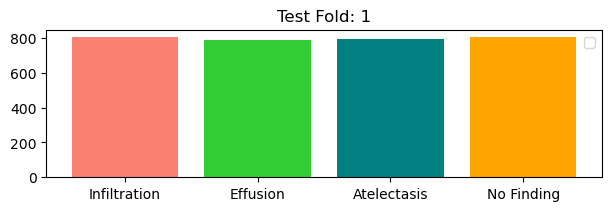

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 1               Count
Infiltration    783
Effusion        809
Atelectasis     797
No Finding      811
    Dataset Infomation:
        >> Train: 3,200
        >> Test: 800
        >> Total: 4,000
    


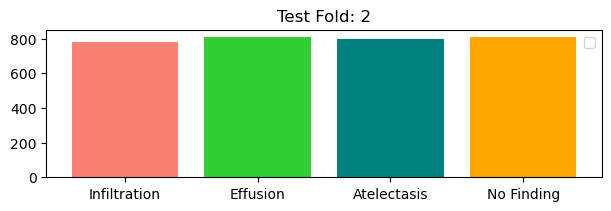

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 2               Count
Infiltration    813
Effusion        785
Atelectasis     808
No Finding      794
    Dataset Infomation:
        >> Train: 3,200
        >> Test: 800
        >> Total: 4,000
    


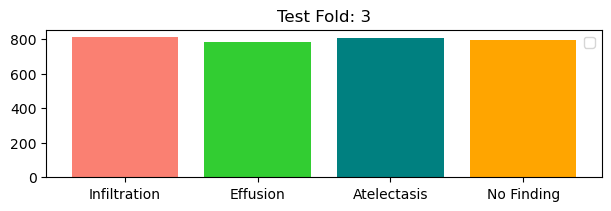

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 3               Count
Infiltration    792
Effusion        809
Atelectasis     821
No Finding      778
    Dataset Infomation:
        >> Train: 3,200
        >> Test: 800
        >> Total: 4,000
    


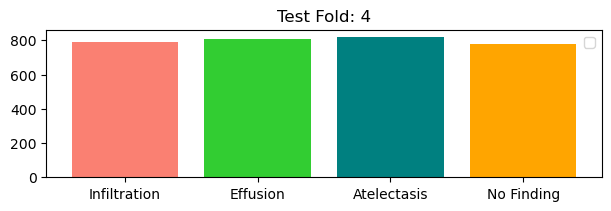

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 4               Count
Infiltration    807
Effusion        807
Atelectasis     777
No Finding      809
    Dataset Infomation:
        >> Train: 3,200
        >> Test: 800
        >> Total: 4,000
    


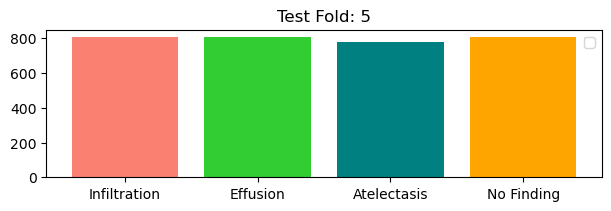

In [17]:
import matplotlib.pyplot as plt

def plot_label_histogram(fold_num, df_train):
    
    count_class = {}
    # print(df_train.columns)
    for each_class in df_train.columns[:] :
        df_new = df_train[each_class].value_counts() 
        # print(df_new)
        count_class[each_class] = [df_new[1]]

    df_count_class = pd.DataFrame(count_class).T
    df_count_class.set_axis(["Count"], axis="columns", inplace=True)

    print("======== " * 10)
    print(f"Fold {fold_num}", df_count_class)
    
    print(f"""\
    Dataset Infomation:
        >> Train: {len(df_train) :,}
        >> Test: {len(df_test) :,}
        >> Total: {len(df_train) + len(df_test) :,}
    """)
    
    fig, ax1 = plt.subplots(
        nrows=1, 
        ncols=1,
        constrained_layout = True,
        figsize=(6,2)
    )

    plt.title(f"Test Fold: {fold_num+1}")
    X_LABELS = df_count_class.index
    X_axis = np.arange(len(df_count_class))
    ax1.set_xticks(X_axis, X_LABELS)

    ax1.bar(X_axis, df_count_class["Count"], 0.8, color=["Salmon", "limegreen", "teal", "orange"])
    plt.legend()
    plt.show()
    
    
for (fold_num, (df_train, df_test)) in enumerate([
    (pd.concat([df2, df3, df4, df5]), df1),
    (pd.concat([df1, df3, df4, df5]), df2),
    (pd.concat([df1, df2, df4, df5]), df3),
    (pd.concat([df1, df2, df3, df5]), df4),
    (pd.concat([df1, df2, df3, df4]), df5)
        ]):
    
    plot_label_histogram(fold_num, df_train)

## Writea File as Binary

In [18]:
class Directory:
    def create_folds_folder(self):
        os.makedirs(os.path.join(INPUT_PATH, "data", "multiclass_dataset", "folds", "fold1"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", "multiclass_dataset", "folds", "fold2"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", "multiclass_dataset", "folds", "fold3"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", "multiclass_dataset", "folds", "fold4"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", "multiclass_dataset", "folds", "fold5"), exist_ok=True)
        
NUM_TO_SPLIT_FILES = 100
Directory().create_folds_folder()

In [19]:
# Fold1
tfrec_path = f'{INPUT_PATH}/data/multiclass_dataset/folds/fold1'
for i, fold in tqdm(enumerate(np.array_split(df1, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')

# Fold2
tfrec_path = f'{INPUT_PATH}/data/multiclass_dataset/folds/fold2'
for i, fold in tqdm(enumerate(np.array_split(df2, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')

# Fold3
tfrec_path = f'{INPUT_PATH}/data/multiclass_dataset/folds/fold3'
for i, fold in tqdm(enumerate(np.array_split(df3, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')

# Fold4
tfrec_path = f'{INPUT_PATH}/data/multiclass_dataset/folds/fold4'
for i, fold in tqdm(enumerate(np.array_split(df4, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')

# Fold5
tfrec_path = f'{INPUT_PATH}/data/multiclass_dataset/folds/fold5'
for i, fold in tqdm(enumerate(np.array_split(df5, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')
    
print("Done Preparing!!")


  0%|          | 0/100 [00:00<?, ?it/s]

2023-04-04 17:17:40.973689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 17:17:41.463741: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6701 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 2g.10gb, pci bus id: 0000:ca:00.0, compute capability: 8.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Done Preparing!!


In [20]:
!nvidia-smi

Tue Apr  4 17:18:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:CA:00.0 Off |                   On |
| N/A   38C    P0    77W / 400W |                  N/A |     N/A      Default |
|                               |                      |              Enabled |
+-------------------------------+----------------------+----------------------+

+-----------------------------------------------------------------------------+
| MIG d